# Jawad Chowdhury (801135477)

In [45]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### 1 Analyzing the Wikipedia voters network [9 points]

In [46]:
def get_len_reciprocated_edges(G):
    c=0
    for e in G.edges:
        if (e[0] != e[1]) and (e[1],e[0]) in G.edges:
                c+=1
    return int(c/2)

def get_len_out_degree(G, val_out_degree):
    out_degree_view = G.out_degree()
    c = 0
    for elem in out_degree_view:
        if elem[1] == val_out_degree:
            c+=1
    return c

def get_len_in_degree(G, val_in_degree):
    in_degree_view = G.in_degree()
    c = 0
    for elem in in_degree_view:
        if elem[1] == val_in_degree:
            c+=1
    return c

def get_len_out_degree_gt_10(G):
    out_degree_view = G.out_degree()
    c = 0
    for elem in out_degree_view:
        if elem[1] > 10:
            c+=1
    return c

def get_len_in_degree_lt_10(G):
    in_degree_view = G.in_degree()
    c = 0
    for elem in in_degree_view:
        if elem[1] < 10:
            c+=1
    return c

# file_name = "test_1.txt"
file_name = "Wiki-Vote.txt"
dG = nx.read_edgelist(file_name, create_using=nx.DiGraph)
uG = dG.to_undirected()
no_edges = dG.number_of_edges()
no_edges_uG = uG.number_of_edges()
a1 = dG.number_of_nodes() 
a2 = len(list(nx.selfloop_edges(dG)))
a3 = no_edges - a2
a4 = no_edges_uG - a2
a5 = get_len_reciprocated_edges(dG) 
a6 = get_len_out_degree(dG,0)
a7 = get_len_in_degree(dG,0)
a8 = get_len_out_degree_gt_10(dG)
a9 = get_len_in_degree_lt_10(dG)

print("The number of nodes in the network : ", a1)
print("The number of nodes with a self-edge (self-loop) : ", a2)
print("The number of directed edges in the network : ", a3)
print("The number of undirected edges in the network : ", a4)
print("The number of reciprocated edges in the network : ", a5)
print("The number of nodes of zero out-degree : ", a6)
print("The number of nodes of zero in-degree : ", a7)
print("The number of nodes with more than 10 outgoing edges : ", a8)
print("The number of nodes with fewer than 10 incoming edges : ", a9)

The number of nodes in the network :  7115
The number of nodes with a self-edge (self-loop) :  0
The number of directed edges in the network :  103689
The number of undirected edges in the network :  100762
The number of reciprocated edges in the network :  2927
The number of nodes of zero out-degree :  1005
The number of nodes of zero in-degree :  4734
The number of nodes with more than 10 outgoing edges :  1612
The number of nodes with fewer than 10 incoming edges :  5165


### 2 Further Analyzing the Wikipedia voters network [6 points]

Text(0, 0.5, 'Count')

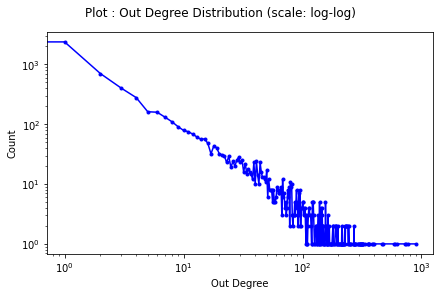

In [47]:
list_od = dG.out_degree()
list_sod = sorted(list_od, key=lambda tup: tup[1])
min_x = list_sod[0][1]
max_x = list_sod[-1][1]
dict_od = {}
for elem in list_sod:
    if elem[1] not in dict_od.keys():
        dict_od[elem[1]] = 1
    else:
        dict_od[elem[1]] += 1
list_x = []
list_y = []
for k,v in dict_od.items():
    list_x.append(k)
    list_y.append(v)
fig1 = plt.figure(constrained_layout=True)
spec1 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig1)
ax1 = fig1.add_subplot(spec1[0, 0])
fig1.suptitle('Plot : Out Degree Distribution (scale: log-log)')
# ax1.plot(list_x, list_y, color='blue', marker='.')
ax1.loglog(list_x, list_y, color='blue', marker='.')
ax1.set_xlabel('Out Degree')
ax1.set_ylabel('Count')

### 3 Finding Experts on the Java Programming Language on StackOverflow[5 points]

In [48]:
file_name = "stackoverflow-java.txt"
dG_stack = nx.read_edgelist(file_name, create_using=nx.DiGraph)
no_wcc_stack = len(list(nx.weakly_connected_components(dG_stack)))
largest_wcc_stack = dG_stack.subgraph(sorted(nx.weakly_connected_components(dG_stack), key=len, reverse=True)[0])
no_nodes_lwccs = largest_wcc_stack.number_of_nodes()
no_edges_lwccs = largest_wcc_stack.number_of_edges()
print("1. The number of weakly connected components in the network : ", no_wcc_stack)
print("2a. The number of nodes in the largest weakly connected component : ", no_nodes_lwccs)
print("2b. The number of edges in the largest weakly connected component : ", no_edges_lwccs)

1. The number of weakly connected components in the network :  10143
2a. The number of nodes in the largest weakly connected component :  131188
2b. The number of edges in the largest weakly connected component :  322486


### 4 Network Characteristics [40 points]:

In [49]:
import random
class CustomGnm:
    def __init__(self, n, m, directed=False):
        self.n = n
        self.m = m
        self.directed = directed
        self.nodes = self.build_nodes()
        self.edges = self.build_edges()
        self.graph = self.build_graph()

    def build_nodes(self):
        return [i for i in range(self.n)]

    def build_edges(self):
        list_edges = []
        list_possible_edges = []
        if not self.directed:
            i = 0
            for i in range(self.n):
                a = self.nodes[i]
                for b in self.nodes[i+1:]:
                    list_possible_edges.append((a,b))
        len_possible_edges = (len(list_possible_edges))
        count_edge = 0
        while (count_edge < self.m):
            i = random.randint(0,len_possible_edges-1)
            possible_edge = list_possible_edges[i]
            if possible_edge not in list_edges:
                list_edges.append(possible_edge)
                count_edge +=1
        return list_edges

    def build_graph(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.edges)
        return G.to_undirected()

class CustomSmallWorldRandomNetwork:
    def __init__(self, n, m=0, directed=False, no_random_edge=0):
        self.no_random_edge = no_random_edge
        self.n = n
        self.directed = directed
        self.nodes = self.build_nodes()
        self.edges = self.build_edges()
        self.m = len(self.edges)
        if self.m != m:
            raise Exception("Error on Graph Formulation!!!")
        self.graph = self.build_graph()

    def build_nodes(self):
        return [i for i in range(self.n)]

    def build_edges(self):
        list_edges = []
        if not self.directed:
            i = 0
            for i in range(self.n):
                a = self.nodes[i]
                next_1_node = (i+1)%self.n
                prev_1_node = (self.n + i-1)%self.n
                next_2_node = (i+2)%self.n
                prev_2_node = (self.n + i-2)%self.n
                if (a,next_1_node) not in list_edges:
                    list_edges.append((a,next_1_node))
                if (prev_1_node,a) not in list_edges:
                    list_edges.append((prev_1_node,a))
                if (a,next_2_node) not in list_edges:
                    list_edges.append((a,next_2_node))
                if (prev_2_node,a) not in list_edges:
                    list_edges.append((prev_2_node,a))
        count_edge = 0
        while (count_edge < self.no_random_edge):
            a = random.randint(0,self.n-1)
            b = random.randint(0,self.n-1)
            if a != b:
                if (a,b) not in list_edges and (b,a) not in list_edges:
                    list_edges.append((a,b))
                    count_edge +=1
        return list_edges

    def build_graph(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.edges)
        return G.to_undirected()

cgnm = CustomGnm(5242,14484)
cswrn = CustomSmallWorldRandomNetwork(5242,14484,no_random_edge=4000)
ngnm = nx.gnm_random_graph(5242,14484)
# cgnm = CustomGnm(6,14)
# cswrn = CustomSmallWorldRandomNetwork(6,14,no_random_edge=2)
# ngnm = nx.gnm_random_graph(6,14)

In [50]:
def plot_degree_distribution(list_graph, scale='normal'):
    plt.figure(figsize=(21,6))

    plt.subplot(1,3,1)
    G = list_graph[0]
    list_d = G.degree()
    list_sd = sorted(list_d, key=lambda tup: tup[1])
    min_x = list_sd[0][1]
    max_x = list_sd[-1][1]
    dict_d = {}
    for elem in list_sd:
        if elem[1] not in dict_d.keys():
            dict_d[elem[1]] = 1
        else:
            dict_d[elem[1]] += 1
    list_x = []
    list_y = []
    for k,v in dict_d.items():
        list_x.append(k)
        list_y.append(v)
    if scale == 'normal':
        plt.plot(list_x, list_y, 'r')
    if scale == 'log':
        plt.loglog(list_x, list_y, 'r')
    plt.title('Custom Gnm')

    plt.subplot(1,3,2)
    G = list_graph[1]
    list_d = G.degree()
    list_sd = sorted(list_d, key=lambda tup: tup[1])
    min_x = list_sd[0][1]
    max_x = list_sd[-1][1]
    dict_d = {}
    for elem in list_sd:
        if elem[1] not in dict_d.keys():
            dict_d[elem[1]] = 1
        else:
            dict_d[elem[1]] += 1
    list_x = []
    list_y = []
    for k,v in dict_d.items():
        list_x.append(k)
        list_y.append(v)
    if scale == 'normal':
        plt.plot(list_x, list_y, 'g')
    if scale == 'log':
        plt.loglog(list_x, list_y, 'g')
    plt.title('Custom Small World Random Network')

    plt.subplot(1,3,3)
    G = list_graph[2]
    list_d = G.degree()
    list_sd = sorted(list_d, key=lambda tup: tup[1])
    min_x = list_sd[0][1]
    max_x = list_sd[-1][1]
    dict_d = {}
    for elem in list_sd:
        if elem[1] not in dict_d.keys():
            dict_d[elem[1]] = 1
        else:
            dict_d[elem[1]] += 1
    list_x = []
    list_y = []
    for k,v in dict_d.items():
        list_x.append(k)
        list_y.append(v)
    if scale == 'normal':
        plt.plot(list_x, list_y, 'b')
    if scale == 'log':
        plt.loglog(list_x, list_y, 'b')
    plt.title('NetworkX Gnm Implementation')
    

In [51]:
def get_clustering_coefficient(G):
    return nx.average_clustering(G)

In [52]:
def get_diameter(G):
    if nx.is_connected(G):
        d = nx.diameter(G)
    else:
        d = 0
        list_cc = nx.connected_components(G)
        for cc in list_cc:
            component = G.subgraph(cc)
            local_d = nx.diameter(component)
            if local_d > d:
                d = local_d
    return d

### Degree Distribution (Count vs Degree)

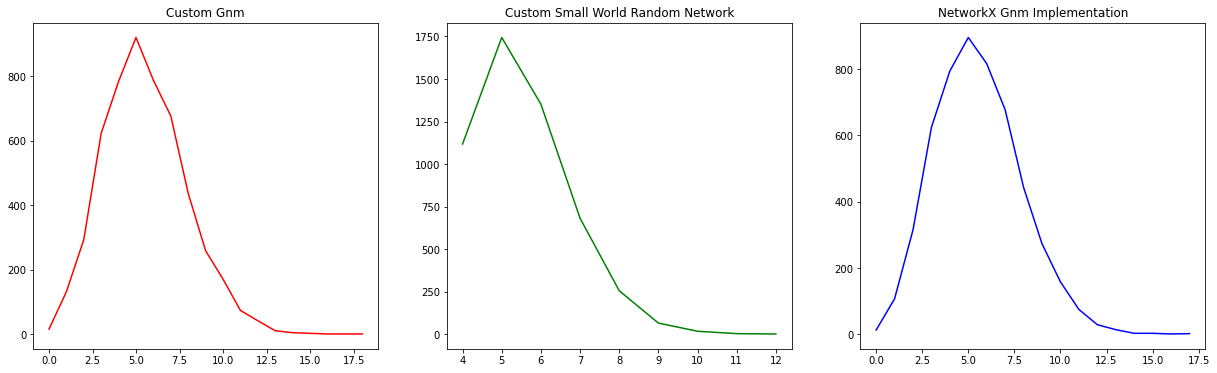

In [53]:
plot_degree_distribution([cgnm.graph, cswrn.graph, ngnm], scale='normal')

### Log-log Degree Distribution (Count vs Degree)

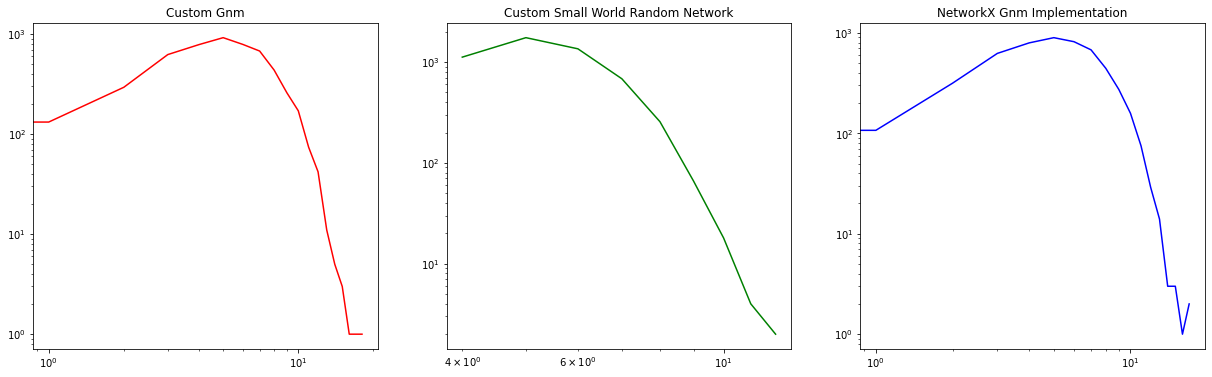

In [54]:
plot_degree_distribution([cgnm.graph, cswrn.graph, ngnm], scale='log')

### Clustering Coefficient

In [55]:
cc_cgnm = get_clustering_coefficient(cgnm.graph)
cc_cswrn = get_clustering_coefficient(cswrn.graph)
cc_ngnm = get_clustering_coefficient(ngnm)

print('Clustering Coefficient (Custom Gnm) : ', cc_cgnm)
print('Clustering Coefficient (Small World Random Network) : ', cc_cswrn)
print('Clustering Coefficient (NetworkX Implementation) : ', cc_ngnm)

Clustering Coefficient (Custom Gnm) :  0.0019055629605038214
Clustering Coefficient (Small World Random Network) :  0.28341714138165497
Clustering Coefficient (NetworkX Implementation) :  0.001442270744793355


### Diameter

In [56]:
d_cgnm = get_diameter(cgnm.graph)
d_cswrn = get_diameter(cswrn.graph)
d_ngnm = get_diameter(ngnm)

print('Diameter (Custom Gnm) : ', d_cgnm)
print('Diameter (Small World Random Network) : ', d_cswrn)
print('Diameter (NetworkX Implementation) : ', d_ngnm)

Diameter (Custom Gnm) :  11
Diameter (Small World Random Network) :  10
Diameter (NetworkX Implementation) :  10


### 5 Random Graphs with Clustering [40 points]

Consider	 the	 following	 random	graph	model	with	 clustering.	 For	n nodes,	we	 have ${n \choose 3}$ distinct	‘triplets’.<br>	 For	 each	triplet,	 with	independent	 probability	 $p$ we	 connect	 the	 nodes	belonging	 to	 this	triplet	in	the	graph	using	three	edges	to	form	a	triangle,<br>	where $p = \dfrac{c}{{n-1 \choose 2}}$, where $c$ is a constant.
Assume n is very large. 

#### Question 1: Prove	that	the	expected	degree	in	this	model	is	2c. 
[Hint:	expected	degree	of	a	node u	 in	 this	generative	model	is	equal	to	twice	the	expected	number	of	triangles	incident	on	u]


**Answer 1:**<br>
To form a triplet, for each node $a$, we need a pair $(b,c)$ where $a\neq b\neq c$.<br>
So, for each node, the possible number of pairs (to form a triplet) = possible number of triplets $=  {n-1 \choose 2} $<br>
Given that, for each triplet, independent probability of forming a triangle $= p$<br>
Therefore, for each node, expected number of triangles $= p*{n-1 \choose 2}$<br>
Here, $ p = \dfrac{c}{{n-1 \choose 2}}$<br>
so, for each node, expected number of triagles $= \dfrac{c}{{n-1 \choose 2}}*{n-1 \choose 2} = c$ <br>
so, expected degree of each node $= 2*$expected number of triangles for that node $= 2c$.

#### Question 2: What	is	the	clustering	coefficient	C?	What	is	the	value	of	C as	n	tends	to	infinity?

 1. n=?
 2. c=?
 3. implementation - probability on for each node, forming on triplet?
 4. derivation + implementation?
 5. 5(b) ?

#### Question 3: Implement	this	model	to	computationally	derive	degree	distribution,	diameter,	and	clustering	coefficient.

#### Implementation - Random Graph with Clustering 

In [162]:
import math
from itertools import combinations 
import random

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def plot_degree_distribution_single(G, scale='normal', title='Random Graph with Clustering'):
    plt.figure(figsize=(10,6))

    plt.subplot(1,1,1)
    list_d = G.degree()
    list_sd = sorted(list_d, key=lambda tup: tup[1])
    min_x = list_sd[0][1]
    max_x = list_sd[-1][1]
    dict_d = {}
    for elem in list_sd:
        if elem[1] not in dict_d.keys():
            dict_d[elem[1]] = 1
        else:
            dict_d[elem[1]] += 1
    list_x = []
    list_y = []
    for k,v in dict_d.items():
        list_x.append(k)
        list_y.append(v)
    if scale == 'normal':
        plt.plot(list_x, list_y, 'r')
    if scale == 'log':
        plt.loglog(list_x, list_y, 'r')
    plt.title(title)
    
def get_diameter(G):
    if nx.is_connected(G):
        d = nx.diameter(G)
    else:
        d = 0
        list_cc = nx.connected_components(G)
        for cc in list_cc:
            component = G.subgraph(cc)
            local_d = nx.diameter(component)
            if local_d > d:
                d = local_d
    return d

def get_clustering_coefficient(G):
    return nx.average_clustering(G)

In [163]:
class ClusteredRandomGraph:
    def __init__(self, n, c, directed=False):
        self.n = n
        self.c = c
        self.directed = directed
        self.p = self.c/nCr(self.n-1,2)
        self.nodes = self.build_nodes()
        self.edges = self.build_edges()
        self.graph = self.build_graph()

    def build_nodes(self):
        return [i for i in range(self.n)]

    def build_edges(self):
        list_possible_triplets = []
        list_triplets = []
        list_edges = []
        for i in range(self.n):
            current_node = self.nodes[i]
            list_possible_other_nodes = self.nodes.copy()
            list_possible_other_nodes.remove(i)
            combs = list(combinations(list_possible_other_nodes, 2))
            for comb in combs:
                comb_triplet = (i,comb[0],comb[1])
                list_possible_triplets.append(comb_triplet)

        for possible_triplets in list_possible_triplets:
            rr = random.random()
            if rr < self.p:
                list_triplets.append(possible_triplets)
        
        for triplets in list_triplets:
            e1 = (triplets[0],triplets[1])
            e2 = (triplets[1],triplets[2])
            e3 = (triplets[2],triplets[0])
            list_edges.append(e1)
            list_edges.append(e2)
            list_edges.append(e3)
        return list_edges

    def build_graph(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.edges)
        return G.to_undirected()

### Following Implementation is with : n = 100, c = 4, $\mathbf{p = \dfrac{c}{{n-1 \choose 2}}}$

In [164]:
crg = ClusteredRandomGraph(100,4) # ClusteredRandomGraph(n,c)
print(crg.p)

0.0008245722531436817


### Degree Distribution (Count vs Degree)

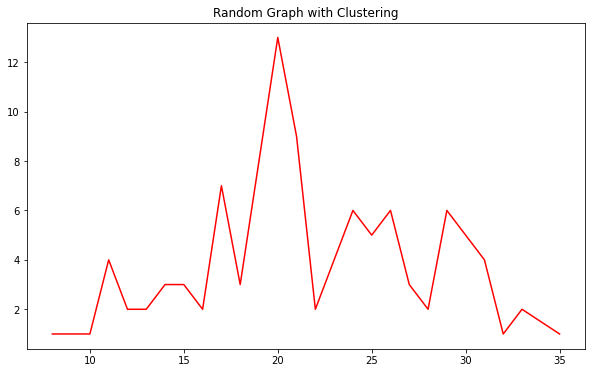

In [165]:
plot_degree_distribution_single(crg.graph, scale='normal', title='Random Graph with Clustering')

### Clustering Coefficient

In [166]:
cc_crg = get_clustering_coefficient(crg.graph)

print('Clustering Coefficient (Random Graph with Clustering) : ', cc_crg)

Clustering Coefficient (Random Graph with Clustering) :  0.26872509577766096


### Diameter

In [167]:
d_crg = get_diameter(crg.graph)

print('Diameter (Random Graph with Clustering) : ', d_crg)

Diameter (Random Graph with Clustering) :  3
